**1. Import Necessary Libraries**

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
import io

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Google Colab specific imports
from google.colab import files

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
)

# Parallel processing
from joblib import Parallel, delayed

# Miscellaneous
from itertools import product

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set Seaborn style
sns.set_style('whitegrid')

**2. Upload and Load the Dataset**

In [3]:
# Prompt the user to upload the .xlsx dataset file
print("Please upload your .xlsx dataset file:")
uploaded = files.upload()

# Load the uploaded .xlsx file into a Pandas DataFrame
filename = next(iter(uploaded))
df = pd.read_excel(io.BytesIO(uploaded[filename]), engine='openpyxl')

# Display the message to confirm successful loading
print("Dataset loaded successfully.")

Please upload your .xlsx dataset file:


Saving RTA Data 2020 to July 2023.xlsx to RTA Data 2020 to July 2023.xlsx
Dataset loaded successfully.


**3. Initial Data Inspection**

First 5 rows:


,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Data Summary and Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EcYear                    46189 non-null  object        
 1   EcNumber                  38978 non-null  object        
 2   CallTime                  40233 non-null  datetime64[ns]
 3   EmergencyArea             46188 non-null  object        
 4   TotalPatientsInEmergency  46189 non-null  object        
 5   Gender                    46188 non-null  object        
 6   Age                       46188 non-null  float64       
 7   HospitalName              24239 non-null  object        
 8   Reason                    46188 non-null  object        
 9   responsetime              46184 non-null  float64       
 10  EducationTitle            46188 non-null  object        
 11  InjuryType                46187 non-null  object       

,Age,responsetime,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
count,46188.000000,46184.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000
mean,32.447129,6.256106,0.008725,0.967242,0.009202,0.234049,0.001970,0.087297,0.009830,0.002208,0.044948,0.117392,0.009656
std,15.176229,4.901342,0.093467,0.578776,0.100349,0.448054,0.044344,0.289319,0.098657,0.046942,0.220947,0.334686,0.098893
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,118.000000,101.000000,2.000000,10.000000,2.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,4.000000,2.000000



Summary Statistics for Categorical Columns:


,EcYear,EcNumber,EmergencyArea,TotalPatientsInEmergency,Gender,HospitalName,Reason,EducationTitle,InjuryType,Cause,PatientStatus
count,46189,38978,46188,46189,46188,24239,46188,46188,46187,46187,46187
unique,5,34800,37520,13,4,162,23940,9,5,7,3
top,2022,284,Railway Track Underpass Nazar Chowk Near Kach...,1,Male,BBH,same,Matric,Minor,Over Speed,Alive & unstable
freq,12902,3,42,36151,39794,6953,2328,15697,34788,29586,23788



Missing Values and Percentage:


,Missing Values,Percentage
HospitalName,21950,47.522137
EcNumber,7211,15.611942
CallTime,5956,12.894845
responsetime,5,0.010825
Cause,2,0.004330
BikesInvolved,2,0.004330
VansInvolved,2,0.004330
TrucksInvolved,2,0.004330
TrainsInvovled,2,0.004330
TractorInvovled,2,0.004330



Cardinality of Categorical Columns (Unique Values in Each Column):


,0
CallTime,40170
EmergencyArea,37520
EcNumber,34800
Reason,23940
HospitalName,162
Age,100
responsetime,68
TotalPatientsInEmergency,13
EducationTitle,9
Cause,7



Value Counts for EcYear:


,count
EcYear,
2022,12902
2021,12677
2020,11382
2023,9227
Hospital,1


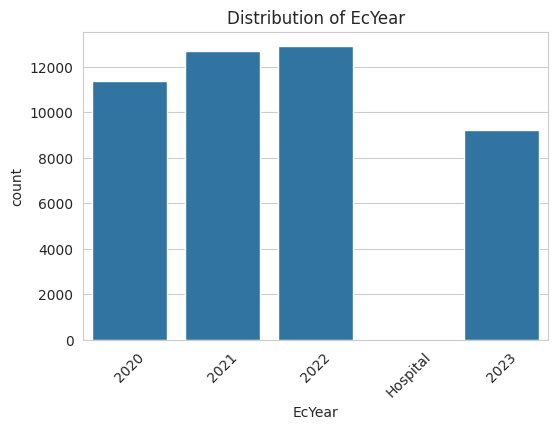


Value Counts for Gender:


,count
Gender,
Male,39794
Female,6392
Other,1
0,1


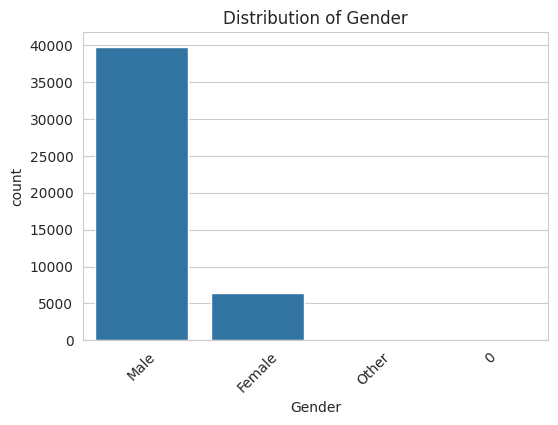


Value Counts for EducationTitle:


,count
EducationTitle,
Matric,15697
Primary,11717
Illetrate,10845
Intermediate,5675
Graduation,1686
Masters,439
Middle,119
PHD,9
0,1


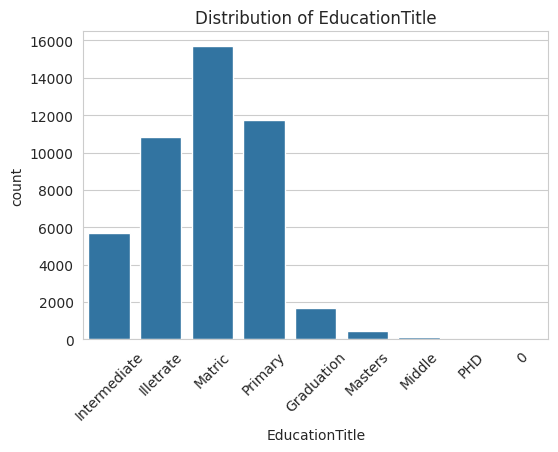


Value Counts for InjuryType:


,count
InjuryType,
Minor,34788
Single Fracture,6737
Head Injury,3503
Multiple Fractures,778
Spinal Injury,381


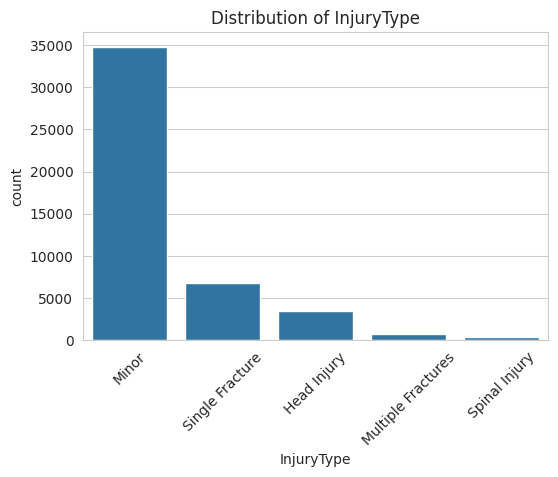


Value Counts for Cause:


,count
Cause,
Over Speed,29586
Carelessness,14177
U Turn,934
Wrong Turn,841
Tyre Burst,481
Others,104
One Wheeling,64


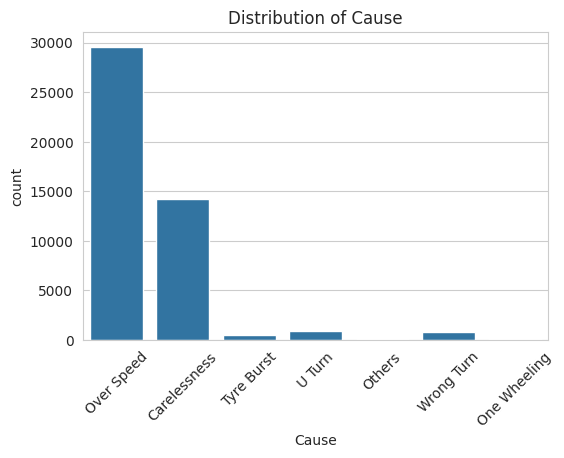


Value Counts for PatientStatus:


,count
PatientStatus,
Alive & unstable,23788
Alive & stable,21812
Dead,587


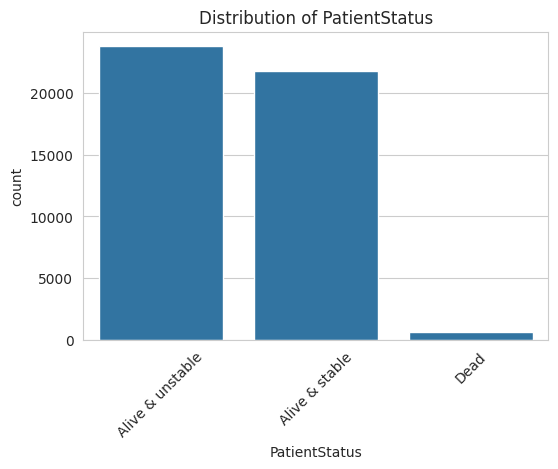


Number of Duplicate Rows in Dataset: 8


In [4]:
def initial_data_inspection(df):
    # Basic Overview
    print("First 5 rows:")
    display(df.head())

    print("\nData Summary and Types:")
    df.info()  # Provides an overview of the data types and missing values

    # Summary statistics for numerical columns
    print("\nSummary Statistics for Numerical Columns:")
    numeric_columns = df.select_dtypes(include=['number'])
    display(numeric_columns.describe())

    # Summary statistics for categorical columns
    print("\nSummary Statistics for Categorical Columns:")
    categorical_columns = df.select_dtypes(include=['object', 'category'])
    display(categorical_columns.describe())

    # Check for missing values
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    print("\nMissing Values and Percentage:")
    missing_summary = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    }).sort_values(by='Percentage', ascending=False)
    display(missing_summary)

    # Cardinality of categorical features (number of unique values)
    print("\nCardinality of Categorical Columns (Unique Values in Each Column):")
    unique_values = df.nunique()
    display(unique_values.sort_values(ascending=False))

    # Distribution and visualization of categorical features with few unique values
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    for col in categorical_columns:
        if df[col].nunique() < 10:  # Only plot for columns with fewer unique values for better visualization
            print(f"\nValue Counts for {col}:")
            display(df[col].value_counts())
            plt.figure(figsize=(6,4))
            sns.countplot(data=df, x=col)
            plt.title(f'Distribution of {col}')
            plt.xticks(rotation=45)
            plt.show()

    # Check for duplicate rows
    num_duplicates = df.duplicated().sum()
    if num_duplicates > 0:
        print(f"\nNumber of Duplicate Rows in Dataset: {num_duplicates}")
    else:
        print("\nNo Duplicate Rows Found in Dataset.")

# Call the function for DataFrame
initial_data_inspection(df)

**4. Split the Dataset into Train, Validation, and Test Sets**

In [5]:
# Split the dataset into 60% training and 40% temporary data
train_set, temp_set = train_test_split(df, test_size=0.4, random_state=42)

# Split the temporary set into 20% validation and 20% test
validation_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

# Confirm the sizes of each set
print(f"Training Set Size: {len(train_set)}")
print(f"Validation Set Size: {len(validation_set)}")
print(f"Test Set Size: {len(test_set)}")

Training Set Size: 27713
Validation Set Size: 9238
Test Set Size: 9238


**5. Data Preprocessing**

**a. Handle Missing Values**

In [6]:
# Identify numerical and categorical columns
numeric_cols = train_set.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_set.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify columns not included in imputation
all_cols = train_set.columns.tolist()
imputed_cols = numeric_cols + categorical_cols
remaining_cols = list(set(all_cols) - set(imputed_cols))
print("\nColumns not included in imputation:", remaining_cols)

# Handle datetime columns separately if any
datetime_cols = [col for col in remaining_cols if np.issubdtype(train_set[col].dtype, np.datetime64)]
other_cols = list(set(remaining_cols) - set(datetime_cols))

# Impute datetime columns without using inplace=True
for col in datetime_cols:
    # Fill missing values in each set with the mode of the training set for consistency
    mode_datetime = train_set[col].mode()[0]
    train_set[col] = train_set[col].fillna(mode_datetime)
    validation_set[col] = validation_set[col].fillna(mode_datetime)
    test_set[col] = test_set[col].fillna(mode_datetime)

# Add other remaining columns to categorical_cols
categorical_cols.extend(other_cols)

# Initialize imputers
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the training set
train_set[numeric_cols] = numeric_imputer.fit_transform(train_set[numeric_cols])
train_set[categorical_cols] = categorical_imputer.fit_transform(train_set[categorical_cols])

# Apply transformations to validation and test sets
validation_set[numeric_cols] = numeric_imputer.transform(validation_set[numeric_cols])
validation_set[categorical_cols] = categorical_imputer.transform(validation_set[categorical_cols])
test_set[numeric_cols] = numeric_imputer.transform(test_set[numeric_cols])
test_set[categorical_cols] = categorical_imputer.transform(test_set[categorical_cols])

# Verify missing values
print("\nTotal missing values after imputation:")
print("Training Set:", train_set.isnull().sum().sum())
print("Validation Set:", validation_set.isnull().sum().sum())
print("Test Set:", test_set.isnull().sum().sum())


Columns not included in imputation: ['CallTime']

Total missing values after imputation:
Training Set: 0
Validation Set: 0
Test Set: 0


**b. Handle Outliers**

In [7]:
# Define a function to handle outliers using the IQR method
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Clip the outliers to the lower and upper bounds
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Apply to numerical columns in each set
handle_outliers(train_set, numeric_cols)
handle_outliers(validation_set, numeric_cols)
handle_outliers(test_set, numeric_cols)

**c. Feature Engineering**

In [8]:
# Extracting features from 'CallTime' column if it exists in the dataset
if 'CallTime' in train_set.columns:
    for dataset in [train_set, validation_set, test_set]:
        dataset['Year'] = pd.to_datetime(dataset['CallTime']).dt.year
        dataset['Month'] = pd.to_datetime(dataset['CallTime']).dt.month
        dataset['Day'] = pd.to_datetime(dataset['CallTime']).dt.day
        dataset['Hour'] = pd.to_datetime(dataset['CallTime']).dt.hour
    # Drop the original 'CallTime' column to prevent redundancy
    train_set.drop(columns=['CallTime'], inplace=True)
    validation_set.drop(columns=['CallTime'], inplace=True)
    test_set.drop(columns=['CallTime'], inplace=True)

**6. Group Rare Categories Before Encoding**

In [9]:
# Re-identify categorical columns excluding target variables and 'CallTime'
categorical_cols = [col for col in categorical_cols if col not in ['InjuryType', 'PatientStatus', 'CallTime']]

print(f"Categorical Columns after exclusion: {categorical_cols}")

# Define a threshold for rare categories (e.g., categories appearing less than 1% of the time)
threshold = 0.01  # 1%

# Function to group rare categories with a safety check
def group_rare_categories(df, column, threshold):
    if column not in df.columns:
        print(f"Column '{column}' does not exist in the dataset. Skipping.")
        return
    freq = df[column].value_counts(normalize=True)
    rare_categories = freq[freq < threshold].index
    df[column] = df[column].replace(rare_categories, 'Other')

# Apply the function to each categorical column
for col in categorical_cols:
    group_rare_categories(train_set, col, threshold)
    group_rare_categories(validation_set, col, threshold)
    group_rare_categories(test_set, col, threshold)

Categorical Columns after exclusion: ['EcYear', 'EcNumber', 'EmergencyArea', 'TotalPatientsInEmergency', 'Gender', 'HospitalName', 'Reason', 'EducationTitle', 'Cause']


**7. Encode Categorical Variables, Excluding Target Variables**

In [10]:
# Exclude target variables from categorical columns (already done, but to ensure)
categorical_cols = [col for col in categorical_cols if col not in ['InjuryType', 'PatientStatus']]

# Convert all categorical columns to strings to avoid mixed data type issues
for col in categorical_cols:
    train_set[col] = train_set[col].astype(str)
    validation_set[col] = validation_set[col].astype(str)
    test_set[col] = test_set[col].astype(str)

# One-hot encoding of categorical columns
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform training data, then apply to validation and test sets
train_encoded = onehot_encoder.fit_transform(train_set[categorical_cols])
validation_encoded = onehot_encoder.transform(validation_set[categorical_cols])
test_encoded = onehot_encoder.transform(test_set[categorical_cols])

# Assign column names to encoded features
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_cols)
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_feature_names)
validation_encoded_df = pd.DataFrame(validation_encoded, columns=encoded_feature_names)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_feature_names)

# Reset the index to prepare for concatenation
train_encoded_df.reset_index(drop=True, inplace=True)
validation_encoded_df.reset_index(drop=True, inplace=True)
test_encoded_df.reset_index(drop=True, inplace=True)

# Drop the original categorical columns (excluding target variables) and concatenate the new encoded features
train_set = pd.concat([train_set.drop(columns=categorical_cols).reset_index(drop=True), train_encoded_df], axis=1)
validation_set = pd.concat([validation_set.drop(columns=categorical_cols).reset_index(drop=True), validation_encoded_df], axis=1)
test_set = pd.concat([test_set.drop(columns=categorical_cols).reset_index(drop=True), test_encoded_df], axis=1)

print(f"Number of features after encoding: {train_set.shape[1]}")

Number of features after encoding: 57


**8. Feature Scaling**

In [11]:
# Initialize the scaler
scaler = StandardScaler()

# Identify numerical columns after encoding
numeric_cols_after_encoding = train_set.select_dtypes(include=[np.number]).columns.tolist()

# Fit the scaler to the training set only
scaler.fit(train_set[numeric_cols_after_encoding])

# Transform the training, validation, and test sets
train_set[numeric_cols_after_encoding] = scaler.transform(train_set[numeric_cols_after_encoding])
validation_set[numeric_cols_after_encoding] = scaler.transform(validation_set[numeric_cols_after_encoding])
test_set[numeric_cols_after_encoding] = scaler.transform(test_set[numeric_cols_after_encoding])

**9. Encode Target Variables**

In [12]:
# Create copies to avoid modifying the original data
train_set_encoded = train_set.copy()
test_set_encoded = test_set.copy()

# Initialize LabelEncoders
label_encoder_injury = LabelEncoder()
label_encoder_status = LabelEncoder()

# Encode 'InjuryType'
train_set_encoded['InjuryType'] = label_encoder_injury.fit_transform(train_set_encoded['InjuryType'])
test_set_encoded['InjuryType'] = label_encoder_injury.transform(test_set_encoded['InjuryType'])

# Encode 'PatientStatus'
train_set_encoded['PatientStatus'] = label_encoder_status.fit_transform(train_set_encoded['PatientStatus'])
test_set_encoded['PatientStatus'] = label_encoder_status.transform(test_set_encoded['PatientStatus'])

# View the mapping
print("InjuryType Classes:", label_encoder_injury.classes_)
print("PatientStatus Classes:", label_encoder_status.classes_)

InjuryType Classes: ['Head Injury' 'Minor' 'Multiple Fractures' 'Single Fracture'
 'Spinal Injury']
PatientStatus Classes: ['Alive & stable' 'Alive & unstable' 'Dead']


**10. Model Training and Evaluation**

In [13]:
# Define target columns
target_cols = ['InjuryType', 'PatientStatus']

# For InjuryType model:
# Features (X) and target (y)
X_train_injury = train_set_encoded.drop(columns=target_cols)
y_train_injury = train_set_encoded['InjuryType']

X_test_injury = test_set_encoded.drop(columns=target_cols)
y_test_injury = test_set_encoded['InjuryType']

# For PatientStatus model:
# Features (X) and target (y)
X_train_status = train_set_encoded.drop(columns=target_cols)
y_train_status = train_set_encoded['PatientStatus']

X_test_status = test_set_encoded.drop(columns=target_cols)
y_test_status = test_set_encoded['PatientStatus']

# Updated solvers list (Only solvers compatible with multinomial)
solvers = ['lbfgs', 'newton-cg', 'sag', 'saga']
max_iters = [50, 100, 150, 200, 250, 300]
combinations = list(product(solvers, max_iters))

def train_evaluate_model(solver, max_iter, X_train, y_train, X_test, y_test, target_label):
    try:
        # Adjust n_jobs parameter based on solver
        n_jobs = -1 if solver in ['sag', 'saga'] else None

        # Initialize model
        model = LogisticRegression(
            solver=solver,
            max_iter=max_iter,
            random_state=42,
            class_weight='balanced',
            penalty='l2',
            multi_class='multinomial',
            n_jobs=n_jobs
        )
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Return results as a dictionary
        return {
            'Solver': solver,
            'Max_iter': max_iter,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1_Score': f1,
            'Confusion_Matrix': conf_matrix,
        }

    except Exception as e:
        # Capture the exception and include solver and max_iter info
        error_message = f"Error with solver={solver}, max_iter={max_iter}: {e}"
        print(error_message)
        return None  # Return None to filter out later

# Function to parallelize model training
def parallel_train_evaluate(comb, X_train, y_train, X_test, y_test, target_label):
    solver, max_iter = comb
    return train_evaluate_model(solver, max_iter, X_train, y_train, X_test, y_test, target_label)

# Train and evaluate models in parallel for InjuryType
print("Training models for InjuryType...")
results_injury = Parallel(n_jobs=-1, verbose=10)(
    delayed(parallel_train_evaluate)(comb, X_train_injury, y_train_injury, X_test_injury, y_test_injury, 'InjuryType')
    for comb in combinations
)

# Remove None results due to errors
results_injury = [res for res in results_injury if res is not None]

# Convert results to DataFrame
results_injury_df = pd.DataFrame(results_injury)

# Display the first few results for InjuryType
print("\nInjuryType Model Results:")
display(results_injury_df.head())

# Train and evaluate models in parallel for PatientStatus
print("\nTraining models for PatientStatus...")
results_status = Parallel(n_jobs=-1, verbose=10)(
    delayed(parallel_train_evaluate)(comb, X_train_status, y_train_status, X_test_status, y_test_status, 'PatientStatus')
    for comb in combinations
)

# Remove None results due to errors
results_status = [res for res in results_status if res is not None]

# Convert results to DataFrame
results_status_df = pd.DataFrame(results_status)

# Display the first few results for PatientStatus
print("\nPatientStatus Model Results:")
display(results_status_df.head())

Training models for InjuryType...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.5min



InjuryType Model Results:


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.2min finished


,Solver,Max_iter,Accuracy,Precision,Recall,F1_Score,Confusion_Matrix
0,lbfgs,50,0.525438,0.706732,0.525438,0.589747,"[[244, 134, 145, 56, 127], [796, 4429, 685, 19..."
1,lbfgs,100,0.525438,0.706732,0.525438,0.589747,"[[244, 134, 145, 56, 127], [796, 4429, 685, 19..."
2,lbfgs,150,0.525438,0.706732,0.525438,0.589747,"[[244, 134, 145, 56, 127], [796, 4429, 685, 19..."
3,lbfgs,200,0.525438,0.706732,0.525438,0.589747,"[[244, 134, 145, 56, 127], [796, 4429, 685, 19..."
4,lbfgs,250,0.525438,0.706732,0.525438,0.589747,"[[244, 134, 145, 56, 127], [796, 4429, 685, 19..."


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



Training models for PatientStatus...


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min



PatientStatus Model Results:


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.9min finished


,Solver,Max_iter,Accuracy,Precision,Recall,F1_Score,Confusion_Matrix
0,lbfgs,50,0.691816,0.856573,0.691816,0.717693,"[[4187, 72, 119], [1268, 2123, 1356], [15, 17,..."
1,lbfgs,100,0.691816,0.856573,0.691816,0.717693,"[[4187, 72, 119], [1268, 2123, 1356], [15, 17,..."
2,lbfgs,150,0.691816,0.856573,0.691816,0.717693,"[[4187, 72, 119], [1268, 2123, 1356], [15, 17,..."
3,lbfgs,200,0.691816,0.856573,0.691816,0.717693,"[[4187, 72, 119], [1268, 2123, 1356], [15, 17,..."
4,lbfgs,250,0.691816,0.856573,0.691816,0.717693,"[[4187, 72, 119], [1268, 2123, 1356], [15, 17,..."


**11. Selecting and Evaluating the Best Models**


Best InjuryType Model:
Solver: saga
Max_iter: 150
Accuracy: 0.5263
Precision: 0.7047
Recall: 0.5263
F1 Score: 0.5897

Best PatientStatus Model:
Solver: sag
Max_iter: 50
Accuracy: 0.6922
Precision: 0.8575
Recall: 0.6922
F1 Score: 0.7176


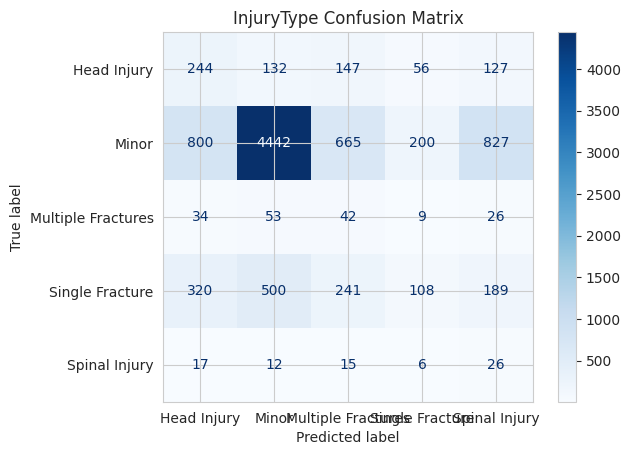

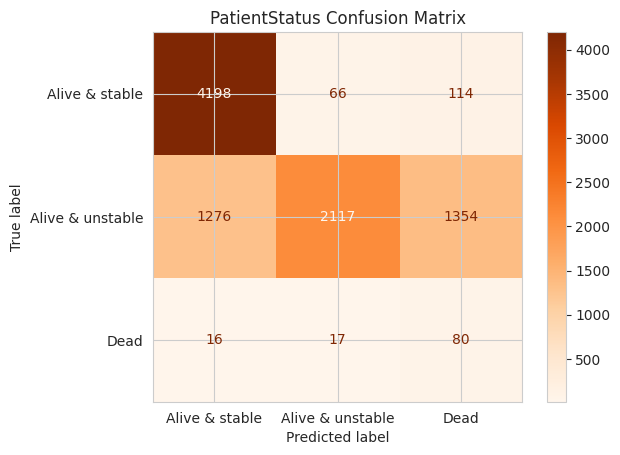

In [14]:
# Function to identify the best model
def get_best_model(results_df, target_label):
    best_model = results_df.loc[results_df['Accuracy'].idxmax()]
    print(f"\nBest {target_label} Model:")
    print(f"Solver: {best_model['Solver']}")
    print(f"Max_iter: {best_model['Max_iter']}")
    print(f"Accuracy: {best_model['Accuracy']:.4f}")
    print(f"Precision: {best_model['Precision']:.4f}")
    print(f"Recall: {best_model['Recall']:.4f}")
    print(f"F1 Score: {best_model['F1_Score']:.4f}")
    return best_model

# Get the best model for InjuryType
best_injury = get_best_model(results_injury_df, 'InjuryType')

# Get the best model for PatientStatus
best_status = get_best_model(results_status_df, 'PatientStatus')

# Function to display confusion matrix for the best model
def display_best_confusion_matrix(best_model_info, target_label, X_train, y_train, X_test, y_test, label_encoder):
    # Initialize the best model
    solver = best_model_info['Solver']
    max_iter = best_model_info['Max_iter']
    n_jobs = -1 if solver in ['sag', 'saga'] else None

    model_best = LogisticRegression(
        solver=solver,
        max_iter=max_iter,
        random_state=42,
        class_weight='balanced',
        penalty='l2',
        multi_class='multinomial',
        n_jobs=n_jobs
    )

    # Retrain the best model on the entire training set
    model_best.fit(X_train, y_train)

    # Predict on the test set
    y_pred_best = model_best.predict(X_test)

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred_best,
        display_labels=label_encoder.classes_,
        cmap=plt.cm.Blues if target_label == 'InjuryType' else plt.cm.Oranges
    )
    plt.title(f'{target_label} Confusion Matrix')
    plt.show()

# Display confusion matrix for InjuryType
display_best_confusion_matrix(
    best_injury,
    'InjuryType',
    X_train_injury,
    y_train_injury,
    X_test_injury,
    y_test_injury,
    label_encoder_injury
)

# Display confusion matrix for PatientStatus
display_best_confusion_matrix(
    best_status,
    'PatientStatus',
    X_train_status,
    y_train_status,
    X_test_status,
    y_test_status,
    label_encoder_status
)

**12. Plotting Learning Curves**

**a. Accuracy vs Solver for InjuryType**

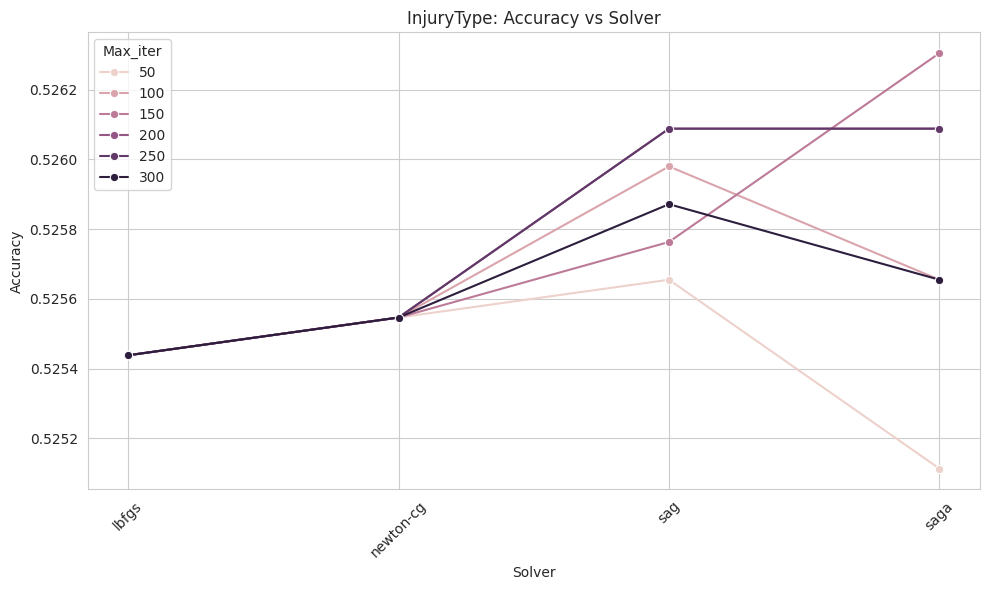

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_injury_df, x='Solver', y='Accuracy', hue='Max_iter', marker='o')
plt.title('InjuryType: Accuracy vs Solver')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.legend(title='Max_iter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**b. Accuracy vs Max_iter for InjuryType**

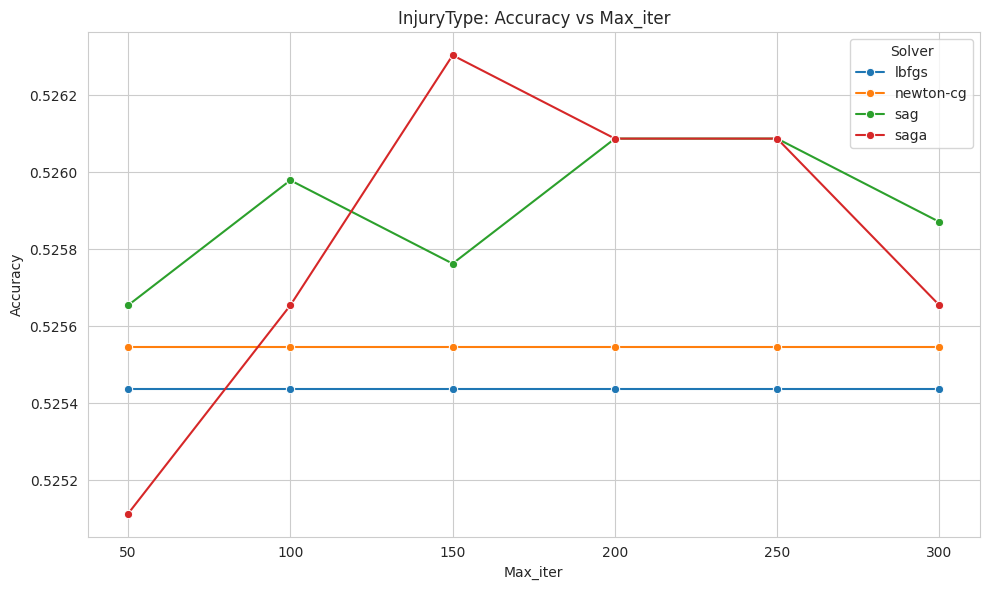

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_injury_df, x='Max_iter', y='Accuracy', hue='Solver', marker='o')
plt.title('InjuryType: Accuracy vs Max_iter')
plt.xlabel('Max_iter')
plt.ylabel('Accuracy')
plt.legend(title='Solver')
plt.tight_layout()
plt.show()

**c. Accuracy vs Solver for PatientStatus**

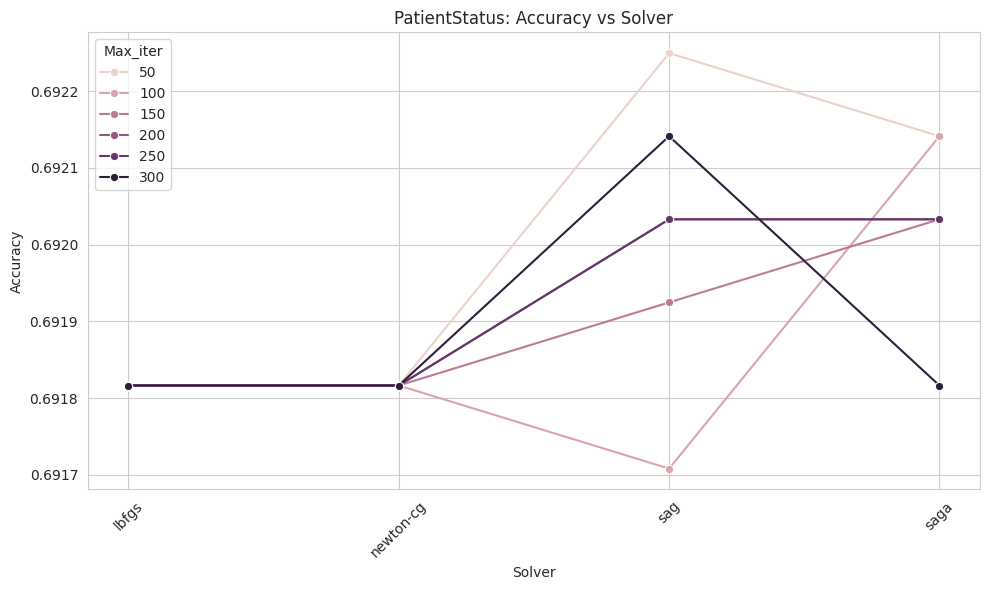

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_status_df, x='Solver', y='Accuracy', hue='Max_iter', marker='o')
plt.title('PatientStatus: Accuracy vs Solver')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.legend(title='Max_iter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**d. Accuracy vs Max_iter for PatientStatus**

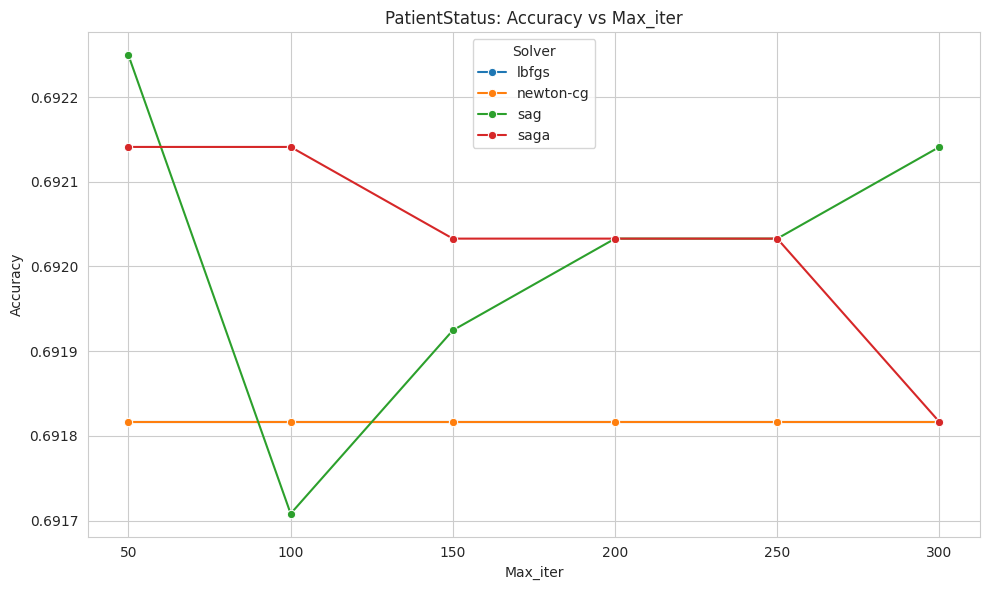

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_status_df, x='Max_iter', y='Accuracy', hue='Solver', marker='o')
plt.title('PatientStatus: Accuracy vs Max_iter')
plt.xlabel('Max_iter')
plt.ylabel('Accuracy')
plt.legend(title='Solver')
plt.tight_layout()
plt.show()